<center><h1> Exploratory Data Analysis of cars dataset (Part 1)</h1></center>

***

In this series of notebooks, I will explore and analyze car dataset, use univariate and multivariate descriptive statistics, visuliaze connections between features and do some statistic manipulations to show main characteristics of data. First I will import data, that I got from [cars.kg](cars.kg) and saved in "cars_raw_data.csv". I called raw, because later I will clean the data: fill missing values, detect and maybe eliminate outliers, and maybe rescale data(standartization, normalization).

I will import pandas, which is a library for data analysis, and you can see first 5 rows and last five raws of the data.

In [80]:
import set_jupyter_path
import pandas as pd 
import numpy as np
pd.set_option('float_format', '{:.3f}'.format)
from src.car_price_prediction.utils import dataset_manager
car_data = dataset_manager.get_raw_dataset()

In [81]:
car_data = car_data.replace("", np.nan)
car_data['Объём'] = pd.to_numeric(car_data['Объём'], errors='coerce')
car_data.head(5)

,URL,Активность,Год выпуска,Дата рекламы,КПП,Марка,Модель,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Фото,Цвет,Цена
0,https://cars.kg/offers/700020.html,Expired,1995.000,13.03.2017,NaN,mercedes-benz,NaN,300.000,3.200,задний,11.000,NaN,седан,бензин,['https://i.cars.kg/preview/r/YvS--H_4B-BMdpVk...,темно-синий,3500.000
1,https://cars.kg/offers/700023.html,Expired,2006.000,13.03.2017,NaN,lexus,rx,268.000,3.300,постоянный полный,129000.000,NaN,внедорожник / пикап,бензин,['https://i.cars.kg/preview/r/WOpX4xBLlrC2oZNY...,серебряный,13100.000
2,https://cars.kg/offers/700032.html,Expired,1994.000,13.03.2017,NaN,alfa romeo,164,2.000,2.000,передний,40000.000,NaN,седан,бензин,[],баклажан,142.000
3,https://cars.kg/offers/700033.html,Expired,2003.000,13.03.2017,NaN,toyota,ist,109.000,1.500,передний,122000.000,NaN,хэтчбек,бензин,['https://i.cars.kg/preview/r/3dFkV2XRYnV04GPZ...,серебряный,4500.000
4,https://cars.kg/offers/700038.html,Expired,2005.000,13.03.2017,NaN,mercedes-benz,viano,116.000,2.100,задний,251000.000,NaN,минивэн / бус,дизель,['https://i.cars.kg/preview/r/GfuJvEs6Wn9xNnQD...,бежевый,8700.000


In [82]:
car_data.tail(5)

,URL,Активность,Год выпуска,Дата рекламы,КПП,Марка,Модель,Мощность,Объём,Привод,Пробег,Руль,Тип кузова,Топливо,Фото,Цвет,Цена
87880,https://cars.kg/offers/943622.html,Active,2003.000,22.11.2018,автомат,subaru,forester,220.000,2.000,NaN,153000.000,правый,хэтчбек,бензин,['https://i.cars.kg/preview/r/Z1ZajrtxwkG5nC-5...,белый,5100.000
87881,https://cars.kg/offers/943623.html,Active,1996.000,22.11.2018,механика,mercedes-benz,e-класс,nan,2.000,задний,1.000,левый,седан,бензин,['https://i.cars.kg/preview/r/WhGvwYJzr6nY4XhG...,смарагд,4000.000
87882,https://cars.kg/offers/943626.html,Active,2003.000,22.11.2018,автомат,subaru,forester,220.000,2.000,постоянный полный,153000.000,правый,кроссовер,бензин,['https://i.cars.kg/preview/r/kF7VSgiZQPl34xTs...,белый,5200.000
87883,https://cars.kg/offers/943627.html,Active,2003.000,22.11.2018,автомат,toyota,ipsum,160.000,2.400,полный подключаемый,168.000,NaN,минивэн / бус,бензин,['https://i.cars.kg/preview/r/xFnJBir4ecWn95Mz...,NaN,4800.000
87884,https://cars.kg/offers/943629.html,Active,2012.000,23.11.2018,автомат,toyota,camry,181.000,2.500,передний,123000.000,левый,седан,бензин,['https://i.cars.kg/preview/r/31vWz8zUC13v6tVB...,серый,13500.000


The very first thing I do, is check the shape of our dataframe. Shape function returns a tuple with number of rows as the first element of a tuple and number of columns as the second element of a tuple.

In [83]:
car_data.shape

(87885, 17)

Next we can see the quantity of missing values in each of the columns. We can see that some of the features have a lot of missing values, and some not so much. I will go three ways, first I will create a model with a dataset where all the NaN values were dropped, and second I will impute all the missing NaN values and the third I will try to make maximum unbiased dataset, managing the data as a field expert. All of the three datasets will have different level of bias, I will explore it in 'Dataset Selection' notebook.


In [84]:
car_data.isnull().sum()

URL                 0
Активность          0
Год выпуска      1799
Дата рекламы        0
КПП              2852
Марка               0
Модель           4497
Мощность        18864
Объём            3970
Привод           6028
Пробег          27181
Руль             4571
Тип кузова        457
Топливо          2489
Фото                0
Цвет             7430
Цена              319
dtype: int64

Next I would like to see detailed statistical summary of data. 

In [85]:
car_data.describe()

,Год выпуска,Мощность,Объём,Пробег,Цена
count,86086.000,69021.000,83915.000,60704.000,87566.000
mean,2006.251,15938643474465167507456.000,23877758.746,3980964295641723.500,117139193232.811
std,6.958,3825334715236901009227776.000,4874077305.734,190678201000597536.000,33799311593535.082
min,1961.000,0.000,-2.500,1.000,0.000
25%,2002.000,144.000,2.000,49606.000,4300.000
50%,2006.000,181.000,2.400,111111.000,9500.000
75%,2012.000,250.000,3.500,170000.000,21000.000
max,2018.000,1000000000000000013287555072.000,999999999999.000,9223372036854775808.000,10000000000000000.000


From the summary, we can see that mean of data and standard deviation have extreme values, and looking at max values at dataset, I can suggest that maximum values skewed the mean and std, these extreme high values are not possible. In the dataset categorical features don't have impossible values, and year of the car doesn't have extreme values also. What that means is that categorical features and year feature could be inputed via selection, and continous numbers could be of any range.  
I would want to see the correlation matrix between each of the continous(numeric) features.  
But beforehands, I can say, that there will be no correlation due to the extreme skewness of the data. Let's take a look at it.

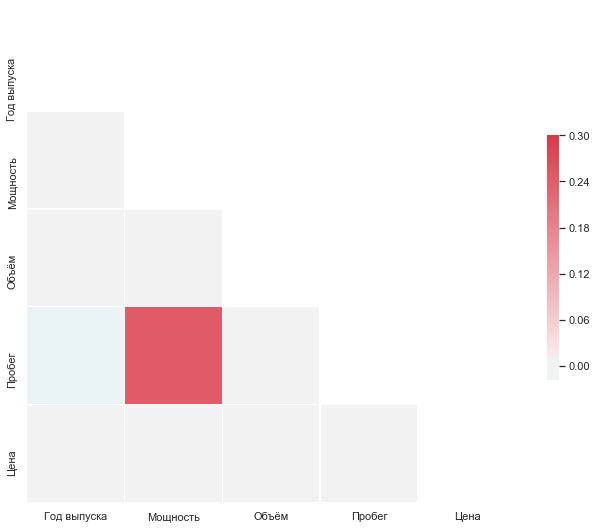

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def plot_heatmap(data):
    sns.set(style = "white")
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_heatmap(car_data)

So in the plot above we can see that correlation between continous variables is very low. So now I will download a cleaned dataset where I used domain knowledge to clean this values.

In [90]:
car_data = dataset_manager.get_cleaned_outliers_dataset()

If we look at the quantity of missing values we can see that there is more missing values now, that's because I changed extreme values to NaNs.

In [95]:
car_data.isna().sum()

Url                 0
Expiration          0
Year             1422
Publication         0
Transmission     2532
Brand               0
Model            4176
Power           19277
Capacity         5369
Drive            5541
Mileage         32541
Wheel            4234
Carcass           276
Fuel             2195
Photo_Urls          0
Color            6831
Price               0
dtype: int64

Now we can continue our Exploritary Analysis. And right away we can see, that all statistic summary now makes full sense. And correlation plotting now is a little bit more reassuring.

In [96]:
car_data.describe()

,Year,Power,Capacity,Mileage,Price
count,84488.000,66633.000,80541.000,53369.000,85910.000
mean,2006.380,203.504,2.728,126325.933,15925.503
std,6.857,86.769,1.110,80156.397,18654.624
min,1961.000,50.000,0.700,1.000,505.000
25%,2002.000,146.000,2.000,69700.000,4300.000
50%,2006.000,181.000,2.400,120361.000,9376.500
75%,2012.000,249.000,3.200,174000.000,20506.750
max,2018.000,600.000,6.400,800000.000,249000.000


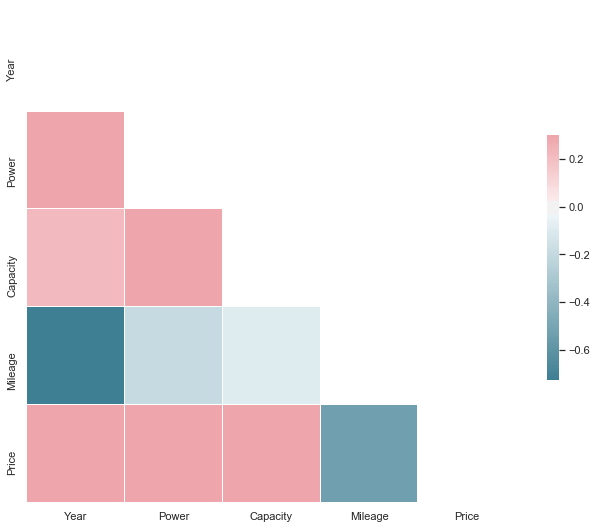

In [98]:
plot_heatmap(car_data)

In [99]:
car_data.corr()

,Year,Power,Capacity,Mileage,Price
Year,1.000,0.316,0.217,-0.728,0.637
Power,0.316,1.000,0.868,-0.188,0.586
Capacity,0.217,0.868,1.000,-0.088,0.509
Mileage,-0.728,-0.188,-0.088,1.000,-0.531
Price,0.637,0.586,0.509,-0.531,1.000


First part of exploratory analysis is over, in the next notebook, I will perform univariate descriptive statistics. 